In [1]:
import pandas as pd
import numpy as np

In [15]:
df_air = pd.read_csv("C:/data/data_air.csv", delimiter=';', encoding='windows-1251', header=0)
df_air = df_air.drop(axis=0, index=0)
df_air.head()

,ID,Period,global_id,StationName,SurveillanceZoneCharacteristics,AdmArea,District,Location,Parameter,MonthlyAverage,...,Period_en,StationName_en,SurveillanceZoneCharacteristics_en,AdmArea_en,District_en,Location_en,Parameter_en,MonthlyAverage_en,MonthlyAveragePDKss_en,Unnamed: 21
1,1,02.2016,272777248,Лосиный остров,Природные территории,Восточный административный округ,район Метрогородок,"улица Ротерта, дом 4, строение 5",Оксид углерода,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,02.2016,272777249,Глебовская,Смешанные антропогенные источники загрязнений,Восточный административный округ,район Богородское,"Глебовская улица, дом 3, корпус 1",Оксид углерода,0.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,02.2016,272777250,Глебовская,Смешанные антропогенные источники загрязнений,Восточный административный округ,район Богородское,"Глебовская улица, дом 3, корпус 1",Сероводород,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,02.2016,272777251,Глебовская,Смешанные антропогенные источники загрязнений,Восточный административный округ,район Богородское,"Глебовская улица, дом 3, корпус 1",Оксид азота,0.014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,02.2016,272777252,Глебовская,Смешанные антропогенные источники загрязнений,Восточный административный округ,район Богородское,"Глебовская улица, дом 3, корпус 1",Диоксид азота,0.024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_air = df_air[['Period', 'StationName', 'Parameter', 'MonthlyAverage']]
df_air['Period'] = pd.to_datetime(df_air['Period'], format='%m.%Y')
df_air['Parameter'].unique()


array(['Оксид углерода', 'Сероводород', 'Оксид азота', 'Диоксид азота',
       'Сумма углеводородных соединений за вычетом метана',
       'Сумма углеводородных соединений', 'Метан',
       'Взвешенные частицы РМ10', 'Диоксид серы',
       'Взвешенные частицы РМ2.5', 'Озон', 'Аммиак',
       'Взвешенные частицы РМ10 (суточные измерения)', 'Кислород',
       'Взвешенные частицы РМ2.5 (суточные измерения)', 'C6H6 (бензол)',
       'C6H5OH (фенол)', 'CH2O (формальдегид)', 'Диоксид углерода',
       'C10H8 (нафталин)', 'C7H8 (толуол)', 'C8H8 (стирол)'], dtype=object)

In [28]:
df_weather_mean = pd.DataFrame({
    'Period':['2.2016', '3.2016', '4.2016', '5.2016', '6.2016', '7.2016', '8.2016', '9.2016', '10.2016', '11.2016', '12.2016',
             '1.2017', '2.2017', '3.2017', '4.2017', '5.2017', '6.2017', '7.2017', '8.2017', '9.2017', '10.2017', '11.2017', '12.2017', 
            '1.2018', '2.2018', '3.2018', '4.2018', '5.2018', '6.2018', '7.2018', '8.2018', '9.2018', '10.2018', '11.2018', '12.2018',
            '1.2019', '2.2019', '3.2019', '4.2019', '5.2019', '6.2019', '7.2019', '8.2019', '9.2019', '10.2019', '11.2019', '12.2019',
            '1.2020', '2.2020', '3.2020', '4.2020', '5.2020', '6.2020', '7.2020', '8.2020', '9.2020', '10.2020', '11.2020', '12.2020',
            '1.2021', '2.2021', '3.2021', '4.2021', '5.2021', '6.2021', '7.2021', '8.2021', '9.2021', '10.2021', '11.2021', '12.2021',
            '1.2022', '2.2022', '3.2022', '4.2022', '5.2022', '6.2022', '7.2022', '8.2022', '9.2022', '10.2022', '11.2022', '12.2022', 
             '1.2023', '2.2023', '3.2023'],
    'temp':[-0.6, 0.3, 8.1, 15.0, 18.2, 20.9, 19.5, 11.4, 4.4, -2.7, -4.6,
                             -7.8, -4.6, 2.4, 5.3, 10.9, 14.4, 17.9, 18.8, 13.0, 5.0, 0.0, 0.0, 
                             -4.3, -9.1, -5.1, 7.8, 16.2, 17.3, 20.5, 19.8, 14.6,  7.3, -0.6, -5.6, 
                             -6.6, -1.4, 0.7, 8.1, 16.3, 19.6, 16.8, 16.4, 12.3, 8.8, 1.8, 0.8, 
                              0.1, -0.3, 3.8, 4.8, 11.7, 18.9, 18.7, 17.6, 13.9, 9.2, 2.2, -4.4,
                             -5.8, -10.5, -1.3, 7.5, 14.3, 20.5, 22.2, 19.5, 9.9, 6.4, 2.3, -7.0, 
                             -5.4, -0.9, -0.7, 5.8, 10.7, 18.9, 20.7, 21.9, 10.1, 7.2, -0.6, -4.1,
                             -4.7, -4.1, 1.3]})
df_weather_mean['Period'] = pd.to_datetime(df_weather_mean['Period'], format='%m.%Y')
df_weather_mean.head()

,Period,temp
0,2016-02-01,-0.6
1,2016-03-01,0.3
2,2016-04-01,8.1
3,2016-05-01,15.0
4,2016-06-01,18.2


In [32]:
df_air = pd.merge(df_air, df_weather_mean,
                       how='left', on='Period')

In [35]:
df_air.dtypes

Period            datetime64[ns]
StationName               object
Parameter                 object
MonthlyAverage            object
temp                     float64
dtype: object

In [36]:
df_air = df_air.astype({'MonthlyAverage': np.float64})

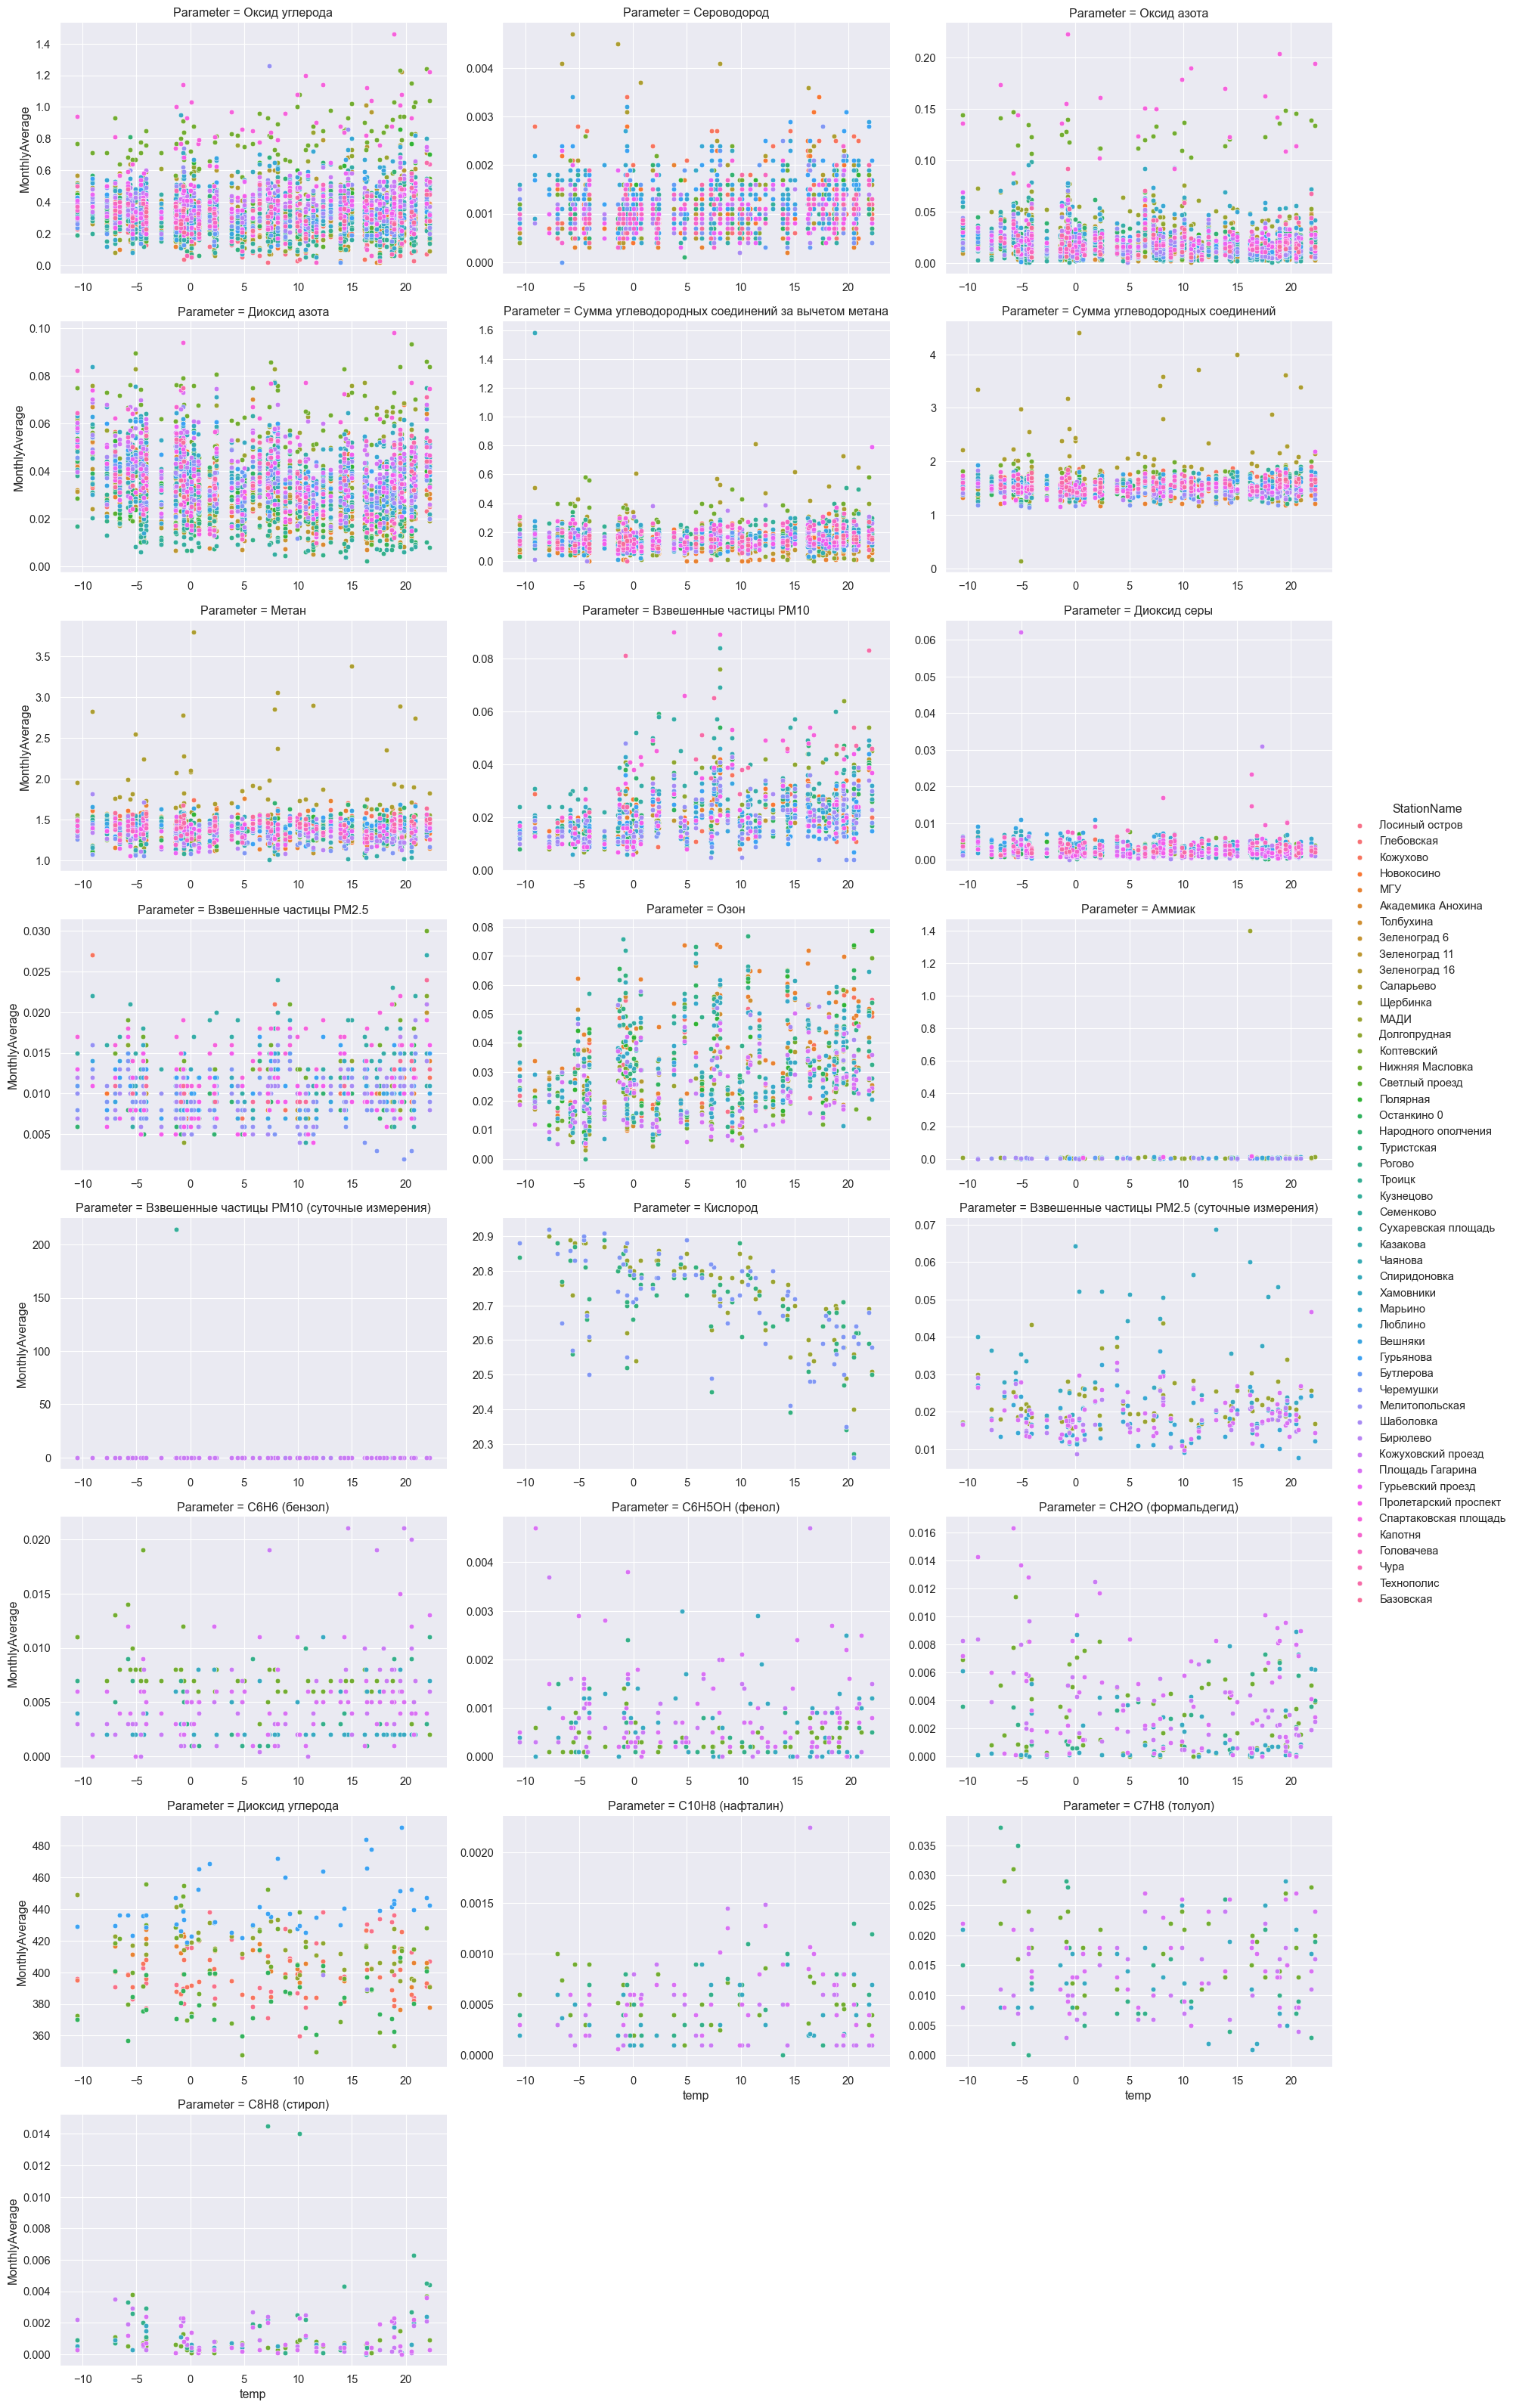

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and context for seaborn plots
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)

# Create a FacetGrid with different scales for each parameter
g = sns.FacetGrid(df_air, col="Parameter", hue="StationName", col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)

# Add scatter plot to the FacetGrid
g.map(sns.scatterplot, "temp", "MonthlyAverage")

# Add legend
g.add_legend()

# Show plot
plt.show()

In [42]:
df_air['StationName'].unique()

array(['Лосиный остров', 'Глебовская', 'Кожухово', 'Новокосино', 'МГУ',
       'Академика Анохина', 'Толбухина', 'Зеленоград 6', 'Зеленоград 11',
       'Зеленоград 16', 'Саларьево', 'Щербинка', 'МАДИ', 'Долгопрудная',
       'Коптевский', 'Нижняя Масловка', 'Светлый проезд', 'Полярная',
       'Останкино 0', 'Народного ополчения', 'Туристская', 'Рогово',
       'Троицк', 'Кузнецово', 'Семенково', 'Сухаревская площадь',
       'Казакова', 'Чаянова', 'Спиридоновка', 'Хамовники', 'Марьино',
       'Люблино', 'Вешняки', 'Гурьянова', 'Бутлерова', 'Черемушки',
       'Мелитопольская', 'Шаболовка', 'Бирюлево', 'Кожуховский проезд',
       'Площадь Гагарина', 'Гурьевский проезд', 'Пролетарский проспект',
       'Спартаковская площадь', 'Капотня', 'Головачева', 'Чура',
       'Технополис', 'Базовская'], dtype=object)

In [43]:
corr_df = df_air.groupby('Parameter')[['MonthlyAverage', 'temp']].corr().iloc[0::2, -1]
corr_df.columns = ['Correlation with Temperature']
corr_df.index = corr_df.index.droplevel(1)
print(corr_df)

Parameter
C10H8 (нафталин)                                     0.118175
C6H5OH (фенол)                                      -0.042528
C6H6 (бензол)                                        0.088192
C7H8 (толуол)                                       -0.002805
C8H8 (стирол)                                        0.051340
CH2O (формальдегид)                                 -0.126959
Аммиак                                               0.073681
Взвешенные частицы РМ10                              0.356876
Взвешенные частицы РМ10 (суточные измерения)        -0.043239
Взвешенные частицы РМ2.5                             0.169731
Взвешенные частицы РМ2.5 (суточные измерения)       -0.003504
Диоксид азота                                       -0.170851
Диоксид серы                                        -0.083427
Диоксид углерода                                    -0.012077
Кислород                                            -0.626841
Метан                                               -0.05673